In [2]:
# Código para entregar una tabla comparatva de los precios de un Arduino UNO (o tarjeta similar genérica) 
# en las tiendas electrónicas de México en archivo CSV

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import random as rd

In [85]:
# Lista de links a los artículos
ing_maker = 'https://www.ingenieromaker.com/product-page/compatible-arduino-uno-r3-c-cable'
microbot = 'https://microbot.mx/products/arduino-uno-r3?_pos=1&_sid=f47977e88&_ss=r'
articles_list = [microbot, ing_maker]


url = 'https://www.taloselectronics.com/collections/arduino'

In [13]:
html = requests.get(ing_maker)
html

<Response [200]>

In [86]:
# Utilizando el driver para extraer el código fuente de cada pagina de la lista de urls
path = r'C:\Program Files\ChromeDriver\chromedriver.exe'

def get_source(url):
    ''' Esta función toma una url y regresa el código fuente
        utilizando el driver de Chrome
    '''
    driver = webdriver.Chrome(path)
    driver.get(url)

    rand_keys(driver)

    page_source = driver.page_source
    
    driver.quit()

    return page_source


def rand_keys(driver):
    ''' Esta función envía teclas presionadas al driver de Chrome.
        La tecla presionada es aleatoria así como el intervalo de
        tiempo entre cada acción.
    '''
    keys_list = ['END', 'HOME', 'ARROW_DOWN', 'ARROW_UP']
    time.sleep(rd.randint(1,3))

    for i in range(rd.randint(1,20)):
        ActionChains(driver).send_keys(Keys.ARROW_DOWN).perform()
        time.sleep(rd.randint(1,3))
        

sources = get_source(url)


C:\Users\User\AppData\Local\Temp/ipykernel_9988/725772910.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


'<html lang="es"><head>\n  \n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1" id="wixDesktopViewport">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="generator" content="Wix.com Website Builder">\n\n  <link rel="icon" sizes="192x192" href="https://static.wixstatic.com/media/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg">\n  <link rel="shortcut icon" href="https://static.wixstatic.com/media/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg" type="image/jpeg">\n  <link rel="apple-touch-icon" href="https://static.wixstatic.com/media/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/04f6a1_b56984152ffc492c86521bc2208aa9fc.jpg" type="image/jpeg">\n  <!-- Safari Pinned Tab Icon -->\n  <!-- <link rel="mask-i
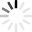

In [59]:
# type(sources)
sources

In [192]:
# Generando conexión con la url y la sopa
def give_me_soup(source):
    """ Esta función toma un listado de urls y devuelve un listado de contenidos html
        en forma de sopa.
    """
    soup = BeautifulSoup(source, 'html')
    return soup

soup = give_me_soup(sources)
soup

<html class="js no-touch" lang="es"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="x-ua-compatible"/>
<link href="https://cdn.shopify.com" rel="preconnect"/>
<link href="https://fonts.shopifycdn.com" rel="preconnect"/>
<link href="https://v.shopify.com" rel="preconnect"/>
<link href="https://cdn.shopifycloud.com" rel="preconnect"/>
<title>Arduino — Talos Electronics</title>
<link href="https://www.taloselectronics.com/collections/arduino" rel="canonical"/>
<meta content="width=device-width" name="viewport"/>
<meta content="Talos Electronics" property="og:site_name"/>
<meta content="https://www.taloselectronics.com/collections/arduino" property="og:url"/>
<meta content="Arduino" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="Venta de electrónicos para estudiantes y aficionados." property="og:description"/>
<meta content="https://cdn.shopify.com/s/files/1/0020/8027/6524/collections/TA0073_1_1200x1200.jpg?v=1589395577" property="og:im

In [201]:
articulo = soup.select('ul div a')
# articulo = articulo[0].text
links = [articulo[i]['href'] for i in range(len(articulo))]
links_href = []
for link in links:
    if link not in links_href:
        links_href.append(link)

art_links = ['https://www.taloselectronics.com/'+link for link in links_href if link.startswith('/collections/arduino')]
# art_links

articles = [get_source(art_link)for art_link in art_links]
# len(articles)


C:\Users\User\AppData\Local\Temp/ipykernel_9988/725772910.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [202]:
art_soups = [give_me_soup(art) for art in articles]

len(art_soups)

24

In [249]:
# maruchan = art_soups[23]
# articulo = maruchan.select('h1')
# articulo = articulo[0].text.strip()

# maruchan = art_soups[23]
# precio = maruchan.select('article span[class="money"]')
# precio[1].text.strip()

articles_name = []
articles_price = []
for art_soup in art_soups:
    articulo = art_soup.select('h1')
    articulo = articulo[0].text.strip()
    articles_name.append(articulo)
    precio = art_soup.select('article span[class="money"]')
    precio = precio[1].text.strip()  
    articles_price.append(precio)


In [253]:
art_dict = {}
for name,price in zip(articles_name, articles_price):
    art_dict[name] = price

art_dict


{'40 Cables Dupont Macho a Macho 20 cm': '$ 55.00',
 '40 Cables Dupont Macho a Hembra 20 cm': '$ 40.00',
 'Arduino Uno R3 ATmega328 Compatible': '$ 300.00',
 'Arduino nano ATmega328 Compatible': '$ 140.00',
 '40 Cables Dupont Hembra a Hembra 20 cm': '$ 35.00',
 '40 Cables Dupont Macho a Macho de 10 cm': '$ 30.00',
 '40 Cables Dupont Macho a Hembra de 10 CM': '$ 30.00',
 'Arduino Mega ATmega2560 compatible': '$ 580.00',
 '40 Cables Dupont Macho a Hembra de 30 cm': '$ 50.00',
 'Convertidor USB A TTL PL2303': '$ 35.00',
 '40 Cables Dupont Macho a Macho 30 cm': '$ 50.00',
 '40 Cables Dupont Hembra a Hembra de 10 cm': '$ 30.00',
 '65 Cables Dupont Macho a Macho': '$ 45.00',
 'Fuente regulada LM2596': '$ 40.00',
 'Ethernet Shield con conector micro SD': '$ 520.00',
 'Kit de arduino básico 263 elementos': '$ 1,400.00',
 'Arduino Pro Mini 328 - 5V/16MHz': '$ 120.00',
 '40 Cables Dupont Hembra a Hembra 30 cm': '$ 50.00',
 'Carcasa de acrílico para Arduino Uno Talos': '$ 80.00',
 'Arduino Shield

In [272]:
df = pd.DataFrame.from_dict(articles_name)
df2= pd.DataFrame.from_dict(articles_price)
df = pd.concat([df, df2], axis=1)
df.columns = ['articulo','precio']
df

,articulo,precio
0,40 Cables Dupont Macho a Macho 20 cm,$ 55.00
1,40 Cables Dupont Macho a Hembra 20 cm,$ 40.00
2,Arduino Uno R3 ATmega328 Compatible,$ 300.00
3,Arduino nano ATmega328 Compatible,$ 140.00
4,40 Cables Dupont Hembra a Hembra 20 cm,$ 35.00
5,40 Cables Dupont Macho a Macho de 10 cm,$ 30.00
6,40 Cables Dupont Macho a Hembra de 10 CM,$ 30.00
7,Arduino Mega ATmega2560 compatible,$ 580.00
8,40 Cables Dupont Macho a Hembra de 30 cm,$ 50.00
9,Convertidor USB A TTL PL2303,$ 35.00


In [245]:
maruchan = art_soups[23]
precio = maruchan.select('article span[class="money"]')
precio[1].text.strip()

'$ 85.00'

In [84]:
# Seleccionando de la sopa
articulo = soup.select('h1')
articulo = articulo[0].text

precio = soup.select('article span[data-hook="formatted-primary-price"]')
precio = precio[0].text
precio

# nombre_art = soup.select('article h1')
# nombre_art
# precio = soup.select('article span[data-hook="formatted-primary-price"]')
# precio = precio[0].text
# precio

'$180.00'

In [ ]:
# Func select y select_plus
def select_content():
    
    pass